This is a start to use the reclassified labels by Dirk. These labels are double checked by him and recategorized into more reasonable facies based on the visual observation without advanced examination like diatom check.

In [19]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

plt.style.use('ggplot')
plt.style.use('seaborn-colorblind')
#mpl.rcParams['xtick.labelsize'] = 8
#mpl.rcParams["image.cmap"] = 'gray'
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'

import datetime
date = datetime.datetime.now().strftime('%Y%m%d')

%matplotlib inline

# Develop class prepare_data in the module, wasafacies.py

In [6]:
excel_df = pd.read_excel('data/new facies types 20210728.xlsx', skiprows=5, index_col=0)
excel_df

/home/users/aslee/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  """Entry point for launching an IPython kernel.


,Epoch,Facies,Abbreviation,sea level,Remarks,Core sections
1,Holocene,high energy shallow marine,hsm,marine,"subtidal, coarse grained sediments e.g. shoref...",N13-4 36-61 (channel lag) // N13-4 2-36 (chann...
2,Holocene,high energy channel fill,hcf,NaN,subtidal,N41-4 1-98 // N41-2 70-97 // N40-1 2-100 (shal...
3,Holocene,low energy channel fill,lcf,NaN,subtidal,N31-1 1-94 // N41-2 2-60 // N32-3 2-95 // VVC0...
4,Holocene,sandflat,sf,NaN,intertidal environment,N40-4 2-100 // N36-2 10-147 // N36-4 2-100 // ...
5,Holocene,mud flat,mf,NaN,intertidal environment,N11-1 22-35 // VVC20-2 60-118 // W5-2 22-75 //...
6,Holocene,lagoon,la,NaN,"""brackish"" environment / salt marsh",VVC17-3 95-119 // N71-4 2-42 // N43-1 15-115 /...
7,Holocene,peat,pt,terrestrial,including different peat types,VVC17-2 28-58 // VVC17-3 8-74 // N23-4 33-55 /...
8,Holocene,soil,so,terrestrial,developed on Pleistocene material,VVC17-2 60-66 // VVC17-2 66-76 (Ae horizon of ...
9,Pleistocene,intertidal/marine,pm,marine,marine sediments,N13-2 40-96 (unclear?) // N13-3 2-78 // N23-1 ...
10,Pleistocene,eolian/fluvial,pef,terrestrial,not differentiated / unclear,N15-1 2-90 // N15-2 2-90 // VVC17-1 2-107 // N...


In [7]:
fa_list = []
section_list = []
up_list = []
bl_list = []

for _, row in excel_df.iterrows():
    for seg in row['Core sections'].split('//'):
        if (seg != '') & (seg != ' '):      
            fa_list.append(row.Abbreviation)
            section_list.append(seg.split()[0])
            up_list.append(int(seg.split()[1].split('-')[0]))
            bl_list.append(int(seg.split()[1].split('-')[1]))
bd_df = pd.DataFrame({
    'facies': fa_list,
    'core_section': section_list,
    'upper_cm': up_list,
    'lower_cm': bl_list
})
bd_df

,facies,core_section,upper_cm,lower_cm
0,hsm,N13-4,36,61
1,hsm,N13-4,2,36
2,hsm,N11-2,2,100
3,hsm,N28-1,2,80
4,hsm,VVC20-4,7,48
...,...,...,...,...
63,pm,N15-4,2,94
64,pm,N14-2,16,78
65,pm,N20-1,3,90
66,pm,N16-2,20,70


In [8]:
bd_df.to_csv('results/reclassification_depths_{}.csv'.format(date))

In [9]:
seg_list = []
for row in bd_df.itertuples():
    seg = '{} {} {}'.format(row.core_section, row.upper_cm, row.lower_cm)
    seg_list.append(seg)
    print(seg, end='\t')

N13-4 36 61	N13-4 2 36	N11-2 2 100	N28-1 2 80	VVC20-4 7 48	N16-4 2 90	VVC19-4 2 102	N41-4 1 98	N41-2 70 97	N40-1 2 100	N25-3 20 80	N30-4 2 90	N34-2 2 90	N46-1 5 110	VVC06-2 2 112	N31-1 1 94	N41-2 2 60	N32-3 2 95	VVC06-1 2 112	N40-4 2 100	N36-2 10 147	N36-4 2 100	N26-4 2 90	N38-4 5 100	N43-3 5 120	N11-1 22 35	VVC20-2 60 118	W5-2 22 75	W4-3 5 80	N85-3 33 106	VVC17-3 95 119	N71-4 2 42	N43-1 15 115	VVC16-4 61 100	VVC09-4 41 71	VVC17-2 28 58	VVC17-3 8 74	N23-4 33 55	N71-4 52 65	N11-1 44 52	N18-5 45 77	VVC17-2 60 66	VVC17-2 66 76	VVC17-2 76 98	N23-4 59 70	N71-4 72 87	N11-1 55 72	N13-2 40 96	N13-3 2 78	N23-1 2 81	N16-1 47 90	N18-2 2 80	N71-1 20 90	N23-2 21 97	N23-1 2 83	N15-1 2 90	N15-2 2 90	VVC17-1 2 107	N23-3 40 90	N71-3 2 100	N11-1 85 105	VVC20-1 30 100	N14-1 2 80	N15-4 2 94	N14-2 16 78	N20-1 3 90	N16-2 20 70	VVC18-2 34 92	

In [10]:
pd.Series(seg_list).duplicated().any()

False

Just check if there is duplicates, meaning same section is assigned to different facies.

In [11]:
# section amount in each facies
bd_df.groupby('facies').count().core_section

facies
hcf     8
hsm     7
la      5
lcf     4
mf      5
pef     8
pm     13
pt      6
sf      6
so      6
Name: core_section, dtype: int64

In [12]:
info_df = pd.read_csv('data/info.cleaned.all.csv', index_col=0, usecols=['composite_id', 'core_section', 'section_depth_mm'])
info_df

,core_section,section_depth_mm
composite_id,,
N10_00001,N10-5,1.00
N10_00003,N10-5,3.00
N10_00005,N10-5,5.00
N10_00007,N10-5,7.00
N10_00009,N10-5,9.00
...,...,...
W6_01840,W6-0,990.04
W6_01842,W6-0,992.04
W6_01844,W6-0,994.04


In [14]:
id_list = []
facies = []

for i in range(len(section_list)):
    X = info_df.index[
        (info_df.core_section == section_list[i]) & 
        (info_df.section_depth_mm >= up_list[i]*10) & 
        (info_df.section_depth_mm < bl_list[i]*10)
    ]
    
    facies += [fa_list[i] for _ in range(len(X))]
    id_list = np.hstack((id_list, X.values))

In [15]:
len(id_list)

19421

In [16]:
data_df = pd.read_csv('data/XRF_results.cleaned.all.csv', index_col=0).loc[id_list, ['Si', 'S', 'Cl', 'K', 'Ca', 'Ti', 'Fe', 'Br', 'Rb', 'Sr', 'Zr', 'Ba']]
data_df

,Si,S,Cl,K,Ca,Ti,Fe,Br,Rb,Sr,Zr,Ba
composite_id,,,,,,,,,,,,
N13_01061,1231,167,1271,929,61779,335,1293,0,6,862,83,39
N13_01063,1958,291,2738,1750,81530,713,2404,44,104,1019,64,74
N13_01065,1998,235,2048,2802,78892,417,1705,48,60,677,66,55
N13_01067,1051,184,1595,1155,155621,234,1188,0,73,964,72,32
N13_01069,2083,231,2587,1382,118827,484,1506,34,87,960,154,135
...,...,...,...,...,...,...,...,...,...,...,...,...
N16_02900,2358,223,1921,6320,14753,4176,8793,0,157,183,513,214
N16_02902,2404,173,2075,6352,15492,3611,9096,11,145,166,465,200
N16_02904,2358,213,2088,6307,16330,3677,9183,0,213,190,409,246


# Test the functions
to create rolling data.

In [1]:
from wasafacies import PrepareData

prepare = PrepareData()
facies, id_list = prepare.create_recla()
r_c_df = prepare.create_roll(facies=facies, id_list=id_list)

/home/users/aslee/WASA_faciesXRF/wasafacies.py:38: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  excel_df = pd.read_excel(self.recla_dir, skiprows=5, index_col=0)


The clr transformed data shape: (19016, 14)
The rolling data shape: (19016, 26)
The tolling data shape without NA: (18200, 26)
NA amount in each section: [16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16
 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16
 16 16 16]


In [3]:
round(18200/19016, 2)

0.96

The NA amounts are all 16, which are the right amount of lossing data due to the rolling trick.

In [2]:
r_c_df

,Si_mean,S_mean,Cl_mean,K_mean,Ca_mean,Ti_mean,Fe_mean,Br_mean,Rb_mean,Sr_mean,...,Ca_std,Ti_std,Fe_std,Br_std,Rb_std,Sr_std,Zr_std,Ba_std,facies,core_section
composite_id,,,,,,,,,,,,,,,,,,,,,
N11_02961,0.472179,-0.998670,0.351662,2.028474,1.292297,1.731292,3.016462,-1.867562,-1.259953,-1.844606,...,0.073416,0.088213,0.076096,0.178647,0.106200,0.202664,0.167435,0.208181,mf,N11-1
N11_02963,0.475915,-0.976695,0.348303,2.029721,1.289529,1.734065,3.021679,-1.854665,-1.262143,-1.860865,...,0.073470,0.088785,0.069518,0.175205,0.104905,0.189915,0.156837,0.203135,mf,N11-1
N11_02965,0.485533,-0.994688,0.342266,2.040438,1.281703,1.744487,3.032798,-1.828262,-1.265527,-1.890336,...,0.062397,0.086634,0.061803,0.165390,0.105908,0.201114,0.117739,0.173006,mf,N11-1
N11_02967,0.509665,-1.029074,0.330719,2.053271,1.284246,1.756956,3.028429,-1.817632,-1.258923,-1.915814,...,0.058152,0.062150,0.049826,0.169467,0.102033,0.215530,0.129437,0.164502,mf,N11-1
N11_02969,0.509358,-0.969764,0.315850,2.049498,1.279461,1.751030,3.045046,-1.800661,-1.274160,-1.932162,...,0.058620,0.065320,0.067498,0.187738,0.104788,0.223066,0.142815,0.166797,mf,N11-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
W5_00514,1.463819,-1.469256,0.832884,1.790148,2.965628,1.157027,1.799611,-4.363051,-1.560359,-1.096831,...,0.127552,0.200626,0.123145,1.510704,0.243735,0.206122,0.231750,0.254985,mf,W5-2
W5_00516,1.469396,-1.462042,0.837881,1.792024,2.970436,1.158352,1.793543,-4.384569,-1.547623,-1.094557,...,0.126060,0.200288,0.122086,1.501885,0.250678,0.205729,0.226577,0.264394,mf,W5-2
W5_00518,1.479664,-1.433263,0.862819,1.807716,2.993859,1.153527,1.802905,-4.491494,-1.552828,-1.096491,...,0.155019,0.200111,0.127048,1.582136,0.246187,0.205218,0.225564,0.272424,mf,W5-2


The data amount is around 1/9 of the data adopting the labels created by the "experts."

In [1]:
from wasafacies import PrepareData

prepare = PrepareData()
facies, id_list = prepare.create_recla()
norm_df = prepare.create_raw(facies=facies, id_list=id_list)

/home/users/aslee/WASA_faciesXRF/wasafacies.py:34: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  excel_df = pd.read_excel(self.recla_dir, skiprows=5, index_col=0)


In [2]:
norm_df.head()

,Si,S,Cl,K,Ca,Ti,Fe,Br,Rb,Sr,Zr,Ba,facies,core_section
composite_id,,,,,,,,,,,,,,
N13_01061,1.544013,-0.453575,1.575990,1.262540,5.459750,0.242561,1.593151,-5.571569,-3.779810,1.187686,-1.152729,-1.908008,hsm,N13-4
N13_01063,1.069966,-0.836390,1.405270,0.957658,4.799013,0.059768,1.275176,-2.725524,-1.865322,0.416864,-2.350830,-2.205648,hsm,N13-4
N13_01065,1.262182,-0.878135,1.286899,1.600369,4.938115,-0.304634,1.103600,-2.466519,-2.243376,0.179951,-2.148065,-2.330387,hsm,N13-4
N13_01067,1.124714,-0.617847,1.541846,1.219073,6.122396,-0.377462,1.247243,-5.832783,-1.542324,1.038308,-1.556117,-2.367047,hsm,N13-4
N13_01069,1.128258,-1.070888,1.344948,0.717981,5.172118,-0.331221,0.803906,-2.986946,-2.047398,0.353627,-1.476354,-1.608031,hsm,N13-4


<AxesSubplot:ylabel='facies'>

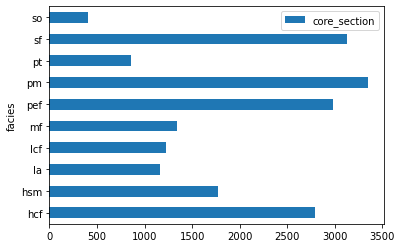

In [6]:
norm_df[['facies', 'core_section']].groupby('facies').count().plot(kind='barh')

Hmm...it's still imbalanced.

## Test self-made split
It shows error during grid searching.

In [16]:
def my_group_stratify_shuffle_cv(y, groups, n_splits = 5, random_state = 24):
    np.random.seed(random_state) 

    for _ in range(n_splits):
        # make sure the test set has at least one section for each facies
        sections_test = []
        for fa in np.unique(y):
            sections_test = np.hstack([sections_test, np.random.choice(np.unique(groups[y == fa]), 1)])
        
        # build the indices for data points
        test_idxs = []
        for section in np.unique(sections_test):
            test_idxs = np.hstack([test_idxs, np.where(groups == section)[0]])
        test_idxs = test_idxs.astype(int)
        
        # the training indices are the rest of indices
        train_idxs = np.array(
            list(
                set(np.arange(0, len(y), 1)) - set(test_idxs)
            )
        )
        
        return train_idxs, test_idxs

In [15]:
my_group_stratify_shuffle_cv(norm_df.facies, norm_df.core_section, n_splits=1)

(array([    0,     1,     2, ..., 19013, 19014, 19015]),
 array([17665, 17666, 17667, ..., 12463, 12464, 12465]))

In [5]:
X = norm_df.iloc[:, :-2].values
y, uniques = pd.factorize(norm_df['facies'])
groups = norm_df['core_section'].values

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from wasafacies import split

pipe = Pipeline([
    ('scaling', StandardScaler()),
    ('pca', PCA()), 
    ('lr', LogisticRegression(max_iter = 10000, class_weight='balanced'))])

param_grid = [
    {'pca': [PCA(whiten=True)],
     'lr__C': np.logspace(-4, 5, 10)},
    {'pca': [None],
     'lr__C': np.logspace(-4, 5, 10)}
]

mycv = split.OnegrupOnefacies_cv(y, groups, n_splits = 5, random_state = 24)
grid = GridSearchCV(pipe, param_grid = param_grid, cv = mycv, scoring = 'balanced_accuracy', n_jobs = -1)

In [8]:
grid.fit(X, y)

GridSearchCV(cv=<generator object split.OnegrupOnefacies_cv at 0x7ffbb66e7950>,
             estimator=Pipeline(steps=[('scaling', StandardScaler()),
                                       ('pca', PCA()),
                                       ('lr',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000))]),
             n_jobs=-1,
             param_grid=[{'lr__C': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04, 1.e+05]),
                          'pca': [PCA(whiten=True)]},
                         {'lr__C': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04, 1.e+05]),
                          'pca': [None]}],
             scoring='balanced_accuracy')

# Evaluate the results
These grid resutls are generated from grid_r_raw_lr/svc/rf.py, grid_r_lr/svr/rf.py and grid_r_2d.py. The codes are modified from prepare_paper.ipynb.

## LR

raw_lr with PCA
Best CV score = 0.616
C = 0.01

raw_lr without PCA
Best CV score = 0.628
C = 0.01

roll_lr with PCA
Best CV score = 0.712
C = 0.0001

roll_lr without PCA
Best CV score = 0.742
C = 0.01

2d_lr with PCA
Best CV score = 0.726
C = 0.001

2d_lr without PCA
Best CV score = 0.749
C = 0.001



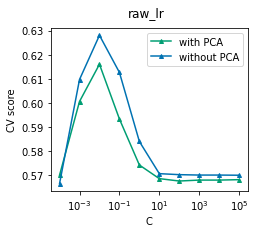

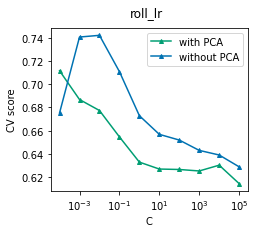

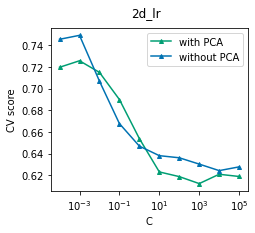

In [55]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

for data_dir in ['results/r_raw_lr_grid_20210804.csv', 
                 'results/r_roll_lr_grid_20210804.csv', 
                 'results/r_2d_lr_grid_20210805.csv']:
    grid_df = pd.read_csv(data_dir, index_col = 0)
    data_type = data_dir[10:-18]
    
    fig = plt.figure(figsize = (3.54, 3))
    plt.xscale('log')
    
    for pca, mask, color in zip(['with PCA', 'without PCA'],
                               [~grid_df.param_pca.isna(), 
                                grid_df.param_pca.isna()],
                               ['C1', 'C0']):
        xx = grid_df.loc[mask, 'param_lr__C'].values.astype(float)
        yy = grid_df.loc[mask, 'mean_test_score'].values.astype(float)
        max_index = np.argmax(yy)
        plt.plot(xx, yy, marker='^', ms=4, label=pca, c=color)
        text = '{} {}\nBest CV score = {:.3f}\nC = {}\n'.format(data_type, 
                                                           pca,
                                                           yy[max_index],
                                                           xx[max_index])
        print(text)
    plt.ylabel('CV score')
    plt.xlabel('C')
    plt.legend()
    plt.suptitle(data_type)
    fig.savefig('results/r_{}_grid_combined_{}.png'.format(data_type, date))

## SVC

raw_svc, with PCA
Best score = 0.645
$\gamma = 0.01, C = 0.1$

raw_svc, without PCA
Best score = 0.646
$\gamma = 0.1, C = 0.1$

roll_svc, with PCA
Best score = 0.706
$\gamma = 0.001, C = 0.1$

roll_svc, without PCA
Best score = 0.753
$\gamma = 0.0001, C = 10.0$

2d_svc, with PCA
Best score = 0.774
$\gamma = 0.001, C = 1.0$

2d_svc, without PCA
Best score = 0.753
$\gamma = 0.001, C = 0.1$



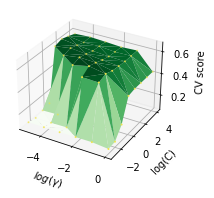

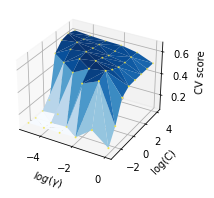

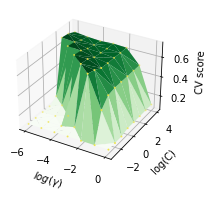

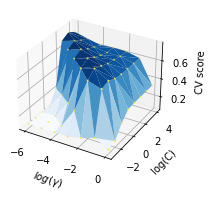

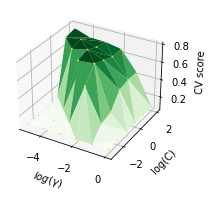

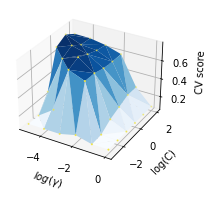

In [62]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

for data_dir in ['results/r_raw_svc_grid_20210804.csv', 
                 'results/r_roll_svc_grid_20210804.csv', 
                 'results/r_2d_svc_grid_20210805.csv']:
    grid_df = pd.read_csv(data_dir, index_col = 0)
    for pca, mask, cmap in zip(['with PCA', 'without PCA'],
                               [~grid_df.param_pca.isna(), 
                                grid_df.param_pca.isna()],
                               [cm.Greens, cm.Blues]):
        data_type = data_dir[10:-18]
        fig = plt.figure(figsize = (3.54, 3))
        ax = plt.gca(projection='3d')
        xx = grid_df.loc[mask, 'param_svc__gamma'].values.astype(float)
        yy = grid_df.loc[mask, 'param_svc__C'].values.astype(float)
        zz = grid_df.loc[mask, 'mean_test_score'].values.astype(float)
        max_index = np.argmax(zz)
        
        surf = ax.plot_trisurf(np.log10(xx), np.log10(yy), zz, cmap = cmap, linewidth = 0.1)
        ax.scatter(np.log10(xx), np.log10(yy), zz, c = 'C4', s = 1)

        # mark the best score
        text = '{}, {}\nBest score = {:.3f}\n$\gamma = {}, C = {}$\n'.format(data_type,
                                                                             pca,
                                                                             zz[max_index], 
                                                                             xx[max_index], 
                                                                             yy[max_index])
        print(text)
        #ax.text(-1, -2, .87, text, fontsize = 10)
        #ax.quiver(np.log10(xx[max_index]), np.log10(yy[max_index]), zz[max_index], 
        #          .3, .3, .3, color='gray', alpha=.6)

        ax.set_xlabel('$log(\gamma)$')
        ax.set_ylabel('log(C)')
        ax.set_zlabel('CV score')
        #fig.colorbar(surf, shrink = 0.5, aspect = 5)
        if len(pca) > 8:
            fig.savefig('results/r_{}_grid_{}.png'.format(data_type, date))
        else:
            fig.savefig('results/r_{}+pca_grid_{}.png'.format(data_type, date))

## RF

raw_rf, with PCA
Best CV score = 0.589
max_depth = 10.0,
n_estimators = 100.0

raw_rf, without PCA
Best CV score = 0.633
max_depth = 5.0,
n_estimators = 5000.0

roll_rf, with PCA
Best CV score = 0.657
max_depth = 5.0,
n_estimators = 1000.0

roll_rf, without PCA
Best CV score = 0.701
max_depth = 5.0,
n_estimators = 1000.0

2d_rf, with PCA
Best CV score = 0.687
max_depth = 5.0,
n_estimators = 1000.0

2d_rf, without PCA
Best CV score = 0.736
max_depth = 5.0,
n_estimators = 100.0



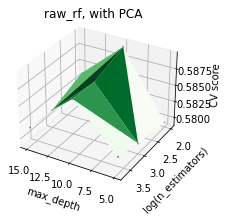

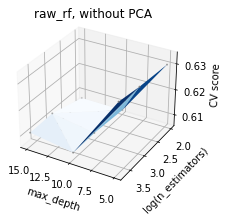

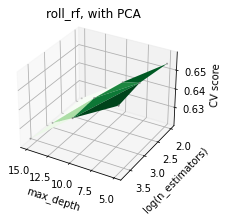

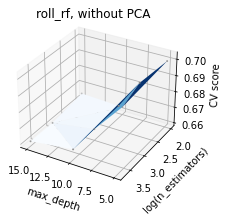

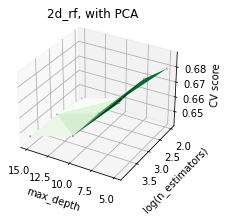

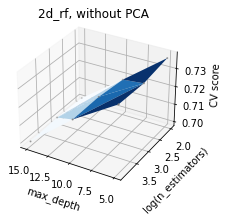

In [8]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

for data_dir in ['results/r_raw_rf_grid_20210804.csv', 
                 'results/r_roll_rf_grid_20210804.csv', 
                 'results/r_2d_rf_grid_20210805.csv']:
    grid_df = pd.read_csv(data_dir, index_col = 0)
    data_type = data_dir[10:-18]

    # with and without PCA
    for pca, mask, cmap in zip(['with PCA', 'without PCA'],
                                    [~grid_df.param_pca.isna(), 
                                     grid_df.param_pca.isna()], 
                                    [cm.Greens, cm.Blues]):
        fig = plt.figure(figsize = (3.54, 3))
        ax = plt.gca(projection='3d')
        xx = grid_df.loc[mask, 'param_rf__max_depth'].values.astype(float)
        yy = grid_df.loc[mask, 'param_rf__n_estimators'].values.astype(float)
        zz = grid_df.loc[mask, 'mean_test_score'].values.astype(float)
        max_index = np.argmax(zz)

        surf = ax.plot_trisurf(xx, np.log10(yy), zz, cmap = cmap, linewidth = 0.1)
        ax.scatter(xx, np.log10(yy), zz, c = 'grey', s = 1)

        # mark the best score
        text = '{}, {}\nBest CV score = {:.3f}\nmax_depth = {},\nn_estimators = {}\n'.format(
            data_type,
            pca,
            zz[max_index], 
            xx[max_index], 
            yy[max_index])
        #ax.text(12, 2.2, .65, text, fontsize = 10)
        print(text)
        #ax.quiver(np.log10(xx[max_index]), np.log10(yy[max_index]), zz[max_index], 
        #          .3, .3, .3, color='gray', alpha=.6)

        #ax.set_zticks(np.linspace(0.47, 0.51, 5))
        ax.set_yticks(np.linspace(2, 3.5, 4))
        ax.set_xlabel('max_depth')
        ax.set_ylabel('log(n_estimators)')
        ax.set_zlabel('CV score')
        #fig.colorbar(surf, shrink = 0.5, aspect = 5)
        fig.suptitle('{}, {}'.format(data_type,pca))
        fig.subplots_adjust(top=.95)
        # rotate the axes
        ax.view_init(30, 120)
        if len(pca) > 8:
            fig.savefig('results/r_{}_grid_{}.png'.format(data_type, date))
        else:
            fig.savefig('results/r_{}+pca_grid_{}.png'.format(data_type, date))

## Put all grids together

In [21]:
grid_df.loc[grid_df.rank_test_score == 1, 'param_pca'].isna().bool()

True

In [22]:
data_list = []
alg_list = []
pca_list = []
best_df = pd.DataFrame()
for data_dir in ['results/r_raw_lr_grid_20210804.csv', 
                 'results/r_roll_lr_grid_20210804.csv', 
                 'results/r_2d_lr_grid_20210805.csv',
                 'results/r_raw_svc_grid_20210804.csv', 
                 'results/r_roll_svc_grid_20210804.csv', 
                 'results/r_2d_svc_grid_20210805.csv',
                 'results/r_raw_rf_grid_20210804.csv', 
                 'results/r_roll_rf_grid_20210804.csv', 
                 'results/r_2d_rf_grid_20210805.csv']:
    grid_df = pd.read_csv(data_dir, index_col=0)
    data_list.append(data_dir.split('_')[1])
    alg_list.append(data_dir.split('_')[2])
    if grid_df.loc[grid_df.rank_test_score == 1, 'param_pca'].isna().bool():
        pca_list.append('no')
    else:
        pca_list.append('yes')
    best_df = pd.concat([best_df, grid_df[grid_df.rank_test_score == 1]], axis=0, join='outer')
    
best_df['data'] = data_list
best_df['algorithm'] = alg_list
best_df['pca'] = pca_list

best_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_lr__C,param_pca,params,split0_test_score,split1_test_score,split2_test_score,...,std_test_score,rank_test_score,param_svc__C,param_svc__gamma,param_scaling,param_rf__max_depth,param_rf__n_estimators,data,algorithm,pca
12,0.660932,0.219871,0.004240,0.000839,0.010,NaN,"{'lr__C': 0.01, 'pca': None}",0.481010,0.744531,0.629033,...,0.084905,1,NaN,NaN,NaN,NaN,NaN,raw,lr,no
12,0.807776,0.057040,0.004435,0.000289,0.010,NaN,"{'lr__C': 0.01, 'pca': None}",0.756849,0.725403,0.750150,...,0.055380,1,NaN,NaN,NaN,NaN,NaN,roll,lr,no
11,8.760410,1.734041,0.017393,0.001427,0.001,NaN,"{'lr__C': 0.001, 'pca': None}",0.776032,0.626430,0.870093,...,0.088276,1,NaN,NaN,NaN,NaN,NaN,2d,lr,no
64,2.116630,0.204252,0.805403,0.032379,NaN,NaN,"{'pca': None, 'svc__C': 0.1, 'svc__gamma': 0.1}",0.538483,0.733685,0.604531,...,0.067696,1,0.1,0.1000,NaN,NaN,NaN,raw,svc,no
86,3.381937,0.608155,1.284756,0.297605,NaN,NaN,"{'pca': None, 'scaling': StandardScaler(), 'sv...",0.776444,0.744821,0.759939,...,0.072189,1,10.0,0.0001,StandardScaler(),NaN,NaN,roll,svc,no
20,7.945936,0.347054,2.521212,0.139854,NaN,"PCA(n_components=50, whiten=True)","{'pca': PCA(n_components=50, whiten=True), 'sv...",0.862553,0.667151,0.808710,...,0.083154,1,1.0,0.0010,NaN,NaN,NaN,2d,svc,yes
11,104.539130,5.118575,4.093838,0.712464,NaN,NaN,"{'pca': None, 'rf__max_depth': 5, 'rf__n_estim...",0.530698,0.746387,0.621655,...,0.068494,1,NaN,NaN,NaN,5.0,5000.0,raw,rf,no
10,33.719843,8.563616,2.524874,0.567796,NaN,NaN,"{'pca': None, 'rf__max_depth': 5, 'rf__n_estim...",0.702309,0.720238,0.714630,...,0.065319,1,NaN,NaN,NaN,5.0,1000.0,roll,rf,no
9,5.317890,0.648700,1.876283,0.375086,NaN,NaN,"{'pca': None, 'rf__max_depth': 5, 'rf__n_estim...",0.738762,0.682917,0.787609,...,0.042835,1,NaN,NaN,NaN,5.0,100.0,2d,rf,no


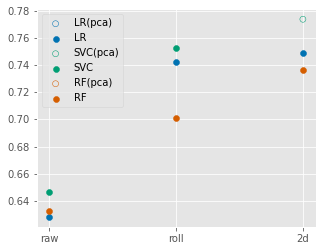

In [43]:
plt.figure(figsize=(5, 4))
for alg, color in zip(['lr', 'svc', 'rf'], ['C0', 'C1', 'C2']):
    # with PCA
    mask = (best_df.algorithm == alg) & (best_df.pca == 'yes')
    plt.scatter(best_df.data[mask], 
                best_df.mean_test_score[mask], 
                facecolors='none', 
                edgecolors=color,
                label='{}(pca)'.format(alg.upper()))
    # without PCA
    mask = (best_df.algorithm == alg) & (best_df.pca == 'no')
    plt.scatter(best_df.data[mask], 
                best_df.mean_test_score[mask], 
                facecolors=color,
                label=alg.upper())

plt.legend()
plt.savefig('results/r_grids_{}.png'.format(date))

Mostly, machine having svc as algorthim or image-like as data representation gives beter performance.

## Check boundaries
Use test set to produce boundaries. I don't use training-dev-test sets now because it's just a pilot workflow, not yet the proper one.

In [2]:
from wasafacies import PrepareData, split
from joblib import load

In [4]:
prepare = PrepareData(data_dir='data/XRF_results.cleaned.all.csv',
                      info_dir='data/info.cleaned.all.csv', 
                      recla_dir='data/new facies types 20210728.xlsx')
facies, id_list = prepare.create_recla()
data_df = prepare.create_raw(facies=facies, id_list=id_list)

train_idx, test_idx = split.train_test_split(data_df.facies.values, data_df.core_section.values)
model = load('models/r_raw_svc_model_20210804.joblib')
y_raw = model.predict(data_df.iloc[test_idx, :-2])

/home/users/aslee/WASA_faciesXRF/wasafacies.py:42: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  excel_df = pd.read_excel(self.recla_dir, skiprows=5, index_col=0)


In [5]:
data_df = prepare.create_roll(facies=facies, id_list=id_list)
model = load('models/r_roll_svc_model_20210804.joblib')
y_roll = model.predict(data_df.iloc[test_idx, :-2])

The clr transformed data shape: (19016, 14)
The rolling data shape: (19016, 26)
The tolling data shape without NA: (18200, 26)
NA amount in each section: [16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16
 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16
 16 16 16]


In [8]:
X, y, groups = prepare.create_2d(facies=facies, id_list=id_list, half_window=8)
model = load('models/r_2d_svc_model_20210805.joblib')
y_2d = model.predict(X[test_idx])

In [12]:
def detect_conjuction(data_df, y_preds, facies_amount):
    """
    data_df is the dataframe having info and labels.
    y_preds is a list of the column names of labels in data_df you want to plot.
    """
    
    data_df['id'] = range(len(data_df))
    mat_dict = {}


    for y_pred in y_preds:
        y_mean = []
        composite_id = []
        model_name = y_pred[2:] if len(y_pred)>1 else 'description'
        
        for section in np.unique(data_df.core_section):
            y_mean = np.hstack((y_mean, data_df.loc[data_df.core_section == section, y_pred].rolling(window = 2).mean()))
            composite_id = np.hstack((composite_id, data_df[data_df.core_section == section].index))

        # merge the rolling with the original label
        # this will lost the first data poit in each section, but it doesn't mater
        # because the boundary shouldn't be at the begining of each section
        tmp_df = pd.concat([data_df, pd.DataFrame({'y_mean': y_mean}, index = composite_id).dropna()], join = 'inner', axis = 1)

        # if y_pred is not same as y_mean, it means there is a boundary (facies change) between this and above depth
        bd_df = tmp_df[tmp_df[y_pred] != tmp_df.y_mean].copy()
        bd_df['ab_id'] = bd_df.id - 1
        if len(model_name) > 6:
            print('There are {} boundaries in description.'.format(len(bd_df)))
        else:
            print('There are {} boundaries in the optimized {} model\'s predictions.'.format(len(bd_df), model_name))

        # build matrix of boundaries
        bd_mat = np.zeros(shape = (facies_amount, facies_amount), dtype = int)

        for row in bd_df.iterrows():
            tmp = np.zeros(shape = (facies_amount, facies_amount), dtype = int)
            tmp[data_df[y_pred][int(row[1].ab_id)], data_df[y_pred][int(row[1].id)]] = 1
            bd_mat += tmp
            
        mat_dict[y_pred] = bd_mat
    
    return mat_dict

In [13]:
y_df = pd.DataFrame({'core_section': groups[test_idx],
                     'y': y[test_idx],
                     'y_raw': y_raw,
                     'y_roll': y_roll,
                     'y_2d': y_2d})

mat_dic = detect_conjuction(y_df, ['y', 'y_raw', 'y_roll', 'y_2d'], 10)

There are 2 boundaries in description.
There are 330 boundaries in the optimized raw model's predictions.
There are 91 boundaries in the optimized roll model's predictions.
There are 159 boundaries in the optimized 2d model's predictions.


Okay, although the machine trained on image-like data by SVC gives the highest accuracy, the machine trained on roll data by SVC, which having 2nd highest accuracy, gives fewest boundaries.

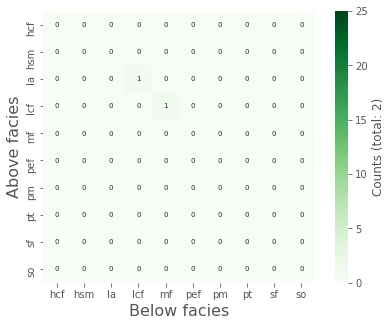

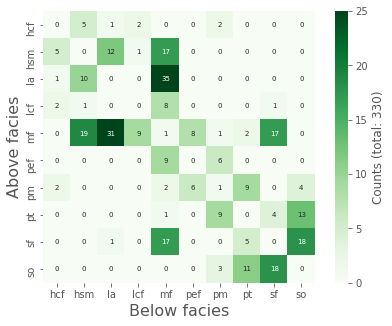

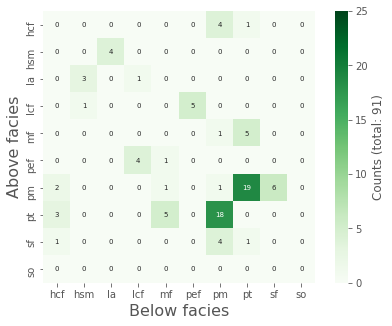

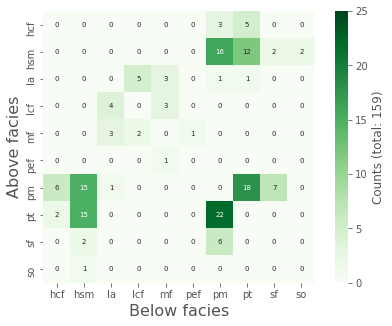

In [31]:
for key in mat_dic.keys():    
    bd_mat = mat_dic[key]
    Facies = np.unique(facies)
    split = 'test'
    
    fig, ax = plt.subplots(1, 1, figsize = (7, 5))
    sns.heatmap(bd_mat, annot = bd_mat.astype(str), ax = ax, cmap = 'Greens', square = True, vmin=0, vmax=25,
                xticklabels = Facies, yticklabels = Facies, fmt = 's', 
                annot_kws={'size': 7}, cbar_kws = {'label' : 'Counts (total: {})'.format(sum(sum(bd_mat)))}
               )
    ax.set_xlabel('Below facies', size = 16)
    ax.set_ylabel('Above facies', size = 16)
    fig.savefig('results/r_{}_{}_conjunction_matrix_{}.png'.format(split, key, date))

In [32]:
def plot_recall(data_df, y_preds, Facies, split):
    """
    data_df is the dataframe having info and labels.
    y_preds is a list of the column names of labels you want to plot.
    Faceis is a list of facies names.
    split is the name of the dataset, which used for filename (train or test)
    """
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import balanced_accuracy_score as score

    for col in y_preds:
        # make confusion matrix between prediction and actual labels
        confusion = confusion_matrix(data_df.y, data_df[col])
        model_name = col[2:]
        con_df = pd.DataFrame(confusion, index = Facies, columns = Facies)
        #con_df.to_csv('results/roll_confusion_{}_{}.csv'.format(model_name, date))

        # normalize the counts ineach row and present in percent
        x = np.copy(confusion).astype(float)
        x /= x.sum(axis = 1, keepdims = True)
        con_per = pd.DataFrame((x*100).astype(int), index = Facies, columns = Facies)
        #con_per.to_csv('results/roll_recall_%_{}_{}.csv'.format(model_name, date))

        # Plot the matrix
        fig, ax = plt.subplots(1, 1, figsize = (7, 5))
        sns.heatmap(con_per, annot = con_per.astype(str), ax = ax, cmap = 'GnBu', square = True, vmin=0, vmax=100,
                    xticklabels = con_per.index, yticklabels = con_per.columns, fmt = 's', 
                    annot_kws={'size': 7}, cbar_kws = {'label' : 'Data percentage in each row'}
                   )

        ax.set_xlabel('Prediction (accuracy: {:.2f})'.format(score(y_true=data_df.y, y_pred=data_df[col])), size = 14)
        ax.set_ylabel('Actual facies', size = 14)
        fig.savefig('results/r_{}_recall_%_{}_{}.png'.format(split, model_name, date))

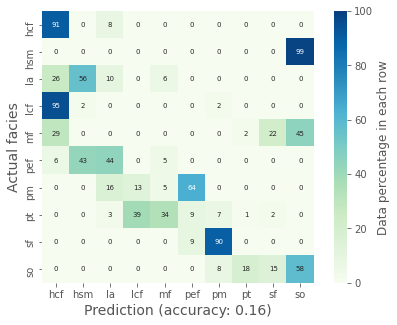

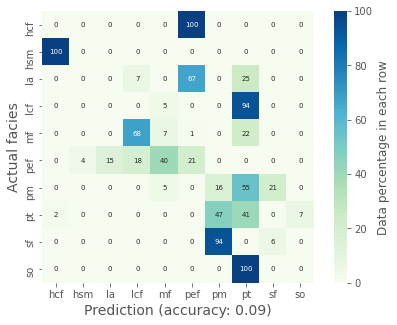

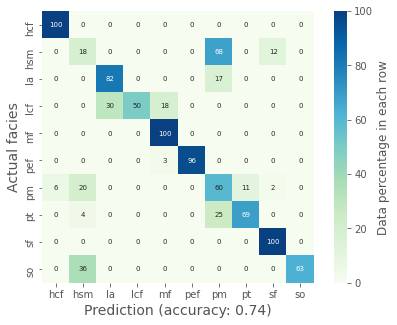

In [33]:
plot_recall(y_df, ['y_raw', 'y_roll', 'y_2d'], Facies, 'test')